In [1]:
# Install required libraries
!pip install pandas numpy statsmodels matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
data = pd.read_csv('IBM2017.csv')

In [4]:
# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Prepare the time series data
y = data['Close']  # Target: closing price

In [6]:
# Normalize the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [7]:
# Split the data into training and test sets
train_size = int(len(y_scaled) * 0.8)
y_train_scaled = y_scaled[:train_size]
y_test_scaled = y_scaled[train_size:]

In [8]:
# Fit the ETS model
model = ETSModel(y_train_scaled, error='add', trend='add', seasonal='add', seasonal_periods=12)
ets_model = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62606D-01    |proj g|=  8.99900D-01

At iterate    1    f= -5.33478D-01    |proj g|=  1.25478D+00

At iterate    2    f= -7.23114D-01    |proj g|=  9.99800D-01

At iterate    3    f= -7.66859D-01    |proj g|=  3.19283D-01

At iterate    4    f= -8.00196D-01    |proj g|=  2.25872D-01

At iterate    5    f= -8.21223D-01    |proj g|=  2.05374D-01

At iterate    6    f= -8.52988D-01    |proj g|=  1.90992D-01

At iterate    7    f= -9.03261D-01    |proj g|=  4.81764D-01

At iterate    8    f= -9.36657D-01    |proj g|=  2.24753D-01

At iterate    9    f= -9.45113D-01    |proj g|=  1.42111D-01

At iterate   10    f= -9.50144D-01    |proj g|=  1.20612D-01

At iterate   11    f= -9.56978D-01    |proj g|=  1.33748D-01

At iterate   12    f= -9.62862D-01    |proj g|=  1.01057D-01

At iterate   13    f= -9.6

In [11]:
# Forecast the future values using the correct method
forecast = ets_model.forecast(steps=len(y_test_scaled))
y_pred_scaled = forecast

In [12]:
# Inverse transform the scaled predictions and actual values
y_test_inv = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

In [13]:
# Evaluate performance
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.48229803520970277


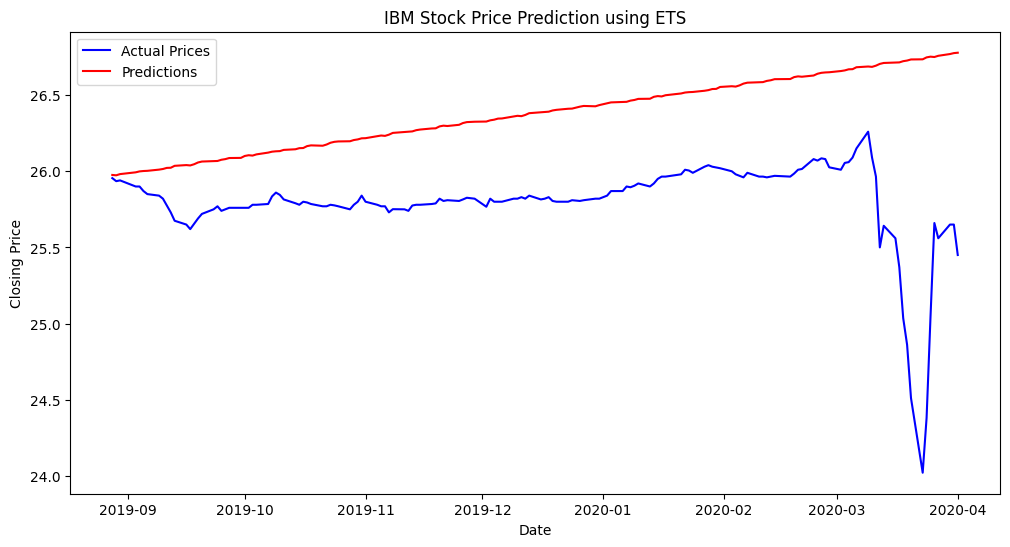

In [14]:
# Plot for visualization of results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_pred_inv):], y_pred_inv, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IBM Stock Price Prediction using ETS')
plt.legend()
plt.show()

Explanation of the Script:

    Install Required Libraries:
        Use !pip install to ensure that pandas, numpy, statsmodels, and matplotlib are installed.

    Load the Data:
        Load the IBM stock data from IBM2017.csv.

    Prepare the Time Series Data:
        Use the Close column as the target variable.

    Normalize the Target Variable:
        Normalize the closing prices using StandardScaler.

    Split the Data:
        Split the data into training and test sets.

    Fit the ETS Model:
        Define and fit the ETS model using the training data. The model parameters (error, trend, seasonal) can be adjusted based on the nature of the data.

    Forecast Future Values:
        Forecast the test period and inverse-transform the scaled predictions.

    Evaluate Performance:
        Calculate the Mean Squared Error (MSE) between the actual and predicted values.

    Plot Results:
        Plot the actual vs. predicted closing prices for visualization.

Notes:

    Ensure the file path 'IBM2017.csv' is correct and that the CSV file contains the necessary columns.
    Adjust ETS model parameters (error, trend, seasonal, seasonal_periods) based on the characteristics of your time series data.
    The seasonal_periods parameter is set to 12 in this example, which assumes monthly data with a yearly seasonality. Adjust this based on your data's frequency and periodicity.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>